In [35]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [36]:
# write your code here
conn = sqlite3.connect("../db.sqlite3")
query = ("SELECT * FROM restaurant_orderitem"
         " JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id"
         " JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id")
df = pd.read_sql_query(query, conn)
# Select specific columns from the DataFrame
df = df[["order_id","datetime", "product_id", "name", "price", "quantity"]]
df = df.rename(columns={"datetime": "order_datetime", "name": "product_name", "price": "product_price"})
df.to_csv("restaurant.csv", index=False)
df = pd.read_csv("restaurant.csv")
df

,order_id,order_datetime,product_id,product_name,product_price,quantity
0,1,2019-08-03 20:25:00,6,Plain Papadum,0.80,2
1,1,2019-08-03 20:25:00,240,King Prawn Balti,12.95,1
2,1,2019-08-03 20:25:00,19,Garlic Naan,2.95,1
3,1,2019-08-03 20:25:00,36,Mushroom Rice,3.95,1
4,1,2019-08-03 20:25:00,111,Paneer Tikka Masala,8.95,1
...,...,...,...,...,...,...
74813,3255,2016-05-18 18:53:00,247,House Red wine 75cl,17.95,2
74814,12905,2016-05-14 19:28:00,247,House Red wine 75cl,17.95,2
74815,3272,2016-05-10 13:18:00,247,House Red wine 75cl,17.95,2
74816,11404,2016-04-07 19:04:00,248,House white wine 75cl,17.95,1


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<Axes: title={'center': 'Top 10 most popular products by quantity sold'}>

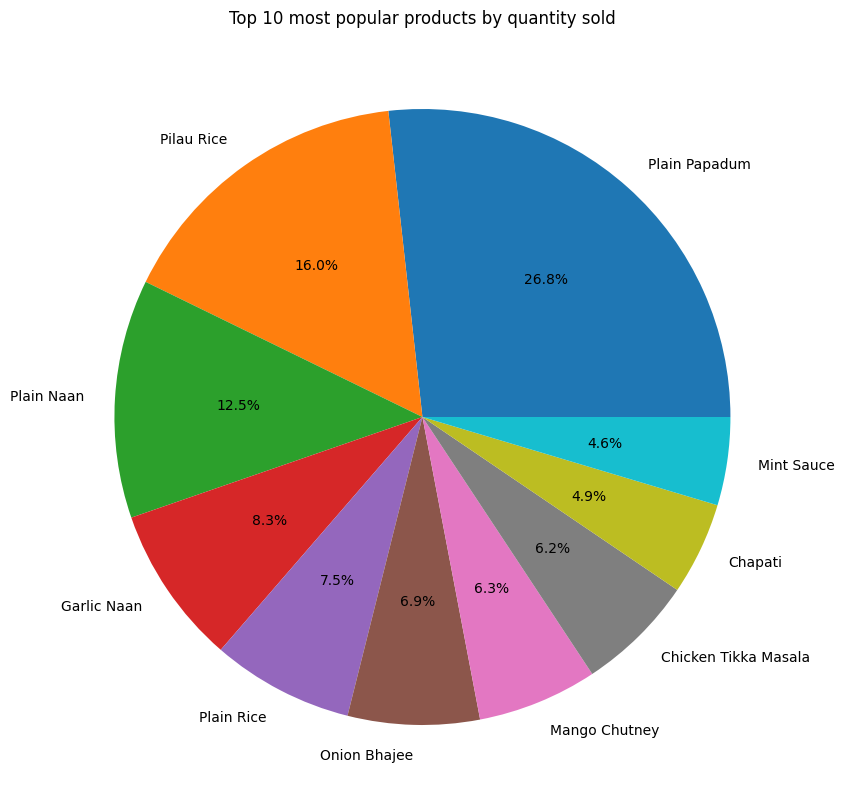

In [37]:
# write your code here
products_q = df["quantity"].groupby(df["product_name"]).sum().sort_values(ascending=False)
products_q_top10 = products_q.head(10)
products_q_top10.plot.pie(title="Top 10 most popular products by quantity sold", figsize=(10, 10), label="", autopct="%1.1f%%")

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<Axes: title={'center': 'Top 10 products by money made'}>

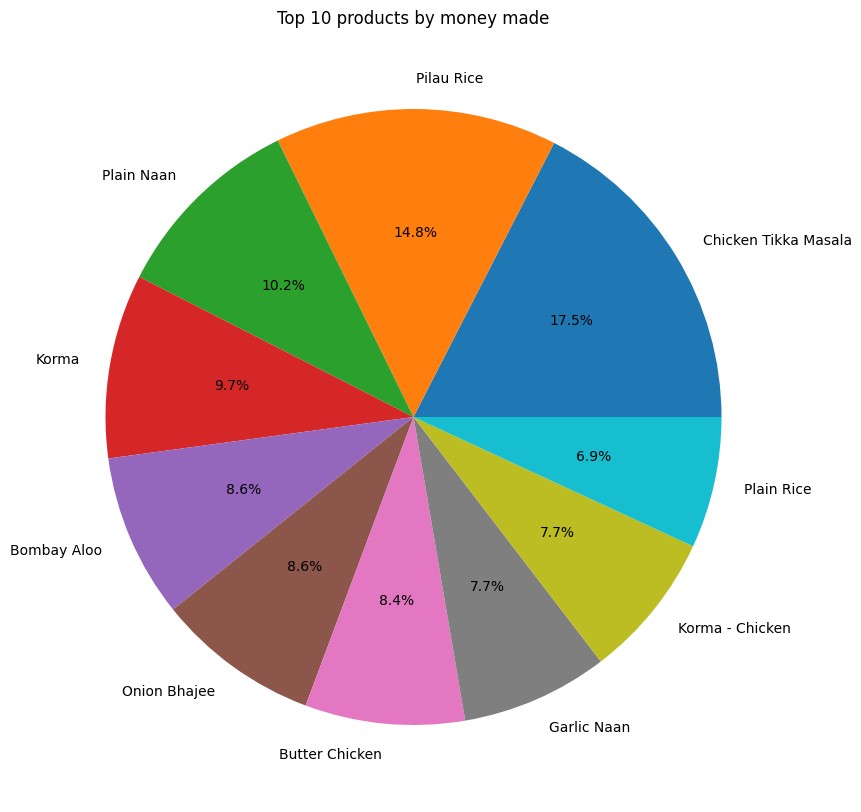

In [38]:
# write your code here
df["item_price"] = df["product_price"] * df["quantity"]
top_items = df["item_price"].groupby(df["product_name"]).sum().sort_values(ascending=False).head(10)
top_items.plot.pie(title="Top 10 products by money made", figsize=(10, 10), label="", autopct="%1.1f%%")

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<Axes: title={'center': 'Total restaurant income by hour'}, xlabel='Hour', ylabel='Income'>

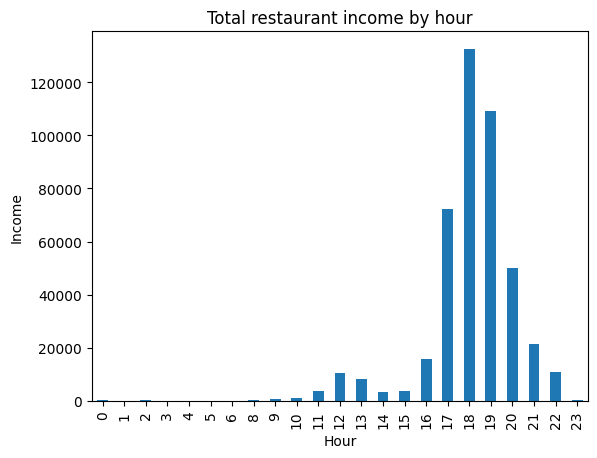

In [39]:
# write your code here
df["order_datetime"] = pd.to_datetime(df["order_datetime"])
df["order_hour"] = df["order_datetime"].dt.hour
hourly_income = df["item_price"].groupby(df["order_hour"]).sum()
hourly_income.plot.bar(title="Total restaurant income by hour", xlabel="Hour", ylabel="Income")

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<Axes: title={'center': 'Total restaurant income by day of the week'}, xlabel='Day of the week', ylabel='Income'>

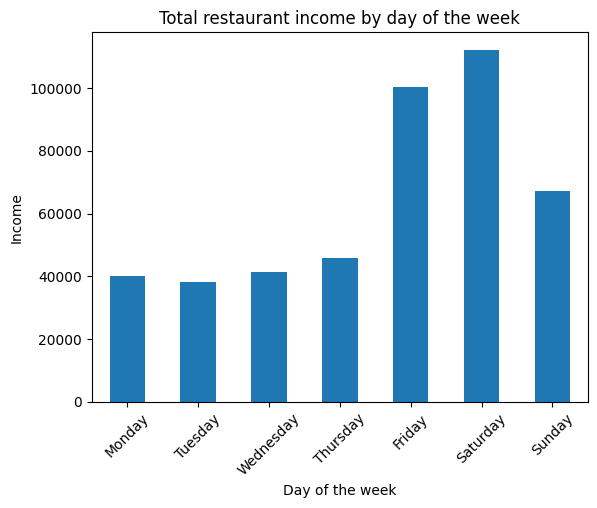

In [40]:
# write your code here
df["order_day_of_week"] = df["order_datetime"].dt.dayofweek
daily_income = df["item_price"].groupby(df["order_day_of_week"]).sum()
daily_income.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_income.plot.bar(title="Total restaurant income by day of the week", xlabel="Day of the week", ylabel="Income", rot=45)